In [109]:
import numpy
from PIL import Image

In [110]:
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = numpy.array(imOrig)

    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]

    return [aRed, aGreen, aBlue, imOrig]

In [111]:

aRed, aGreen, aBlue, originalImage = openImage('Bainsla-Jaini.png')

imageWidth = 1024
imageHeight = 1024

In [112]:
# compression
def compressSingleChannel(color_matrix, iterations):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(color_matrix)
    aChannelCompressed = numpy.zeros((color_matrix.shape[0], color_matrix.shape[1]))
    k = iterations

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed

Populating the interactive namespace from numpy and matplotlib
RED Component 


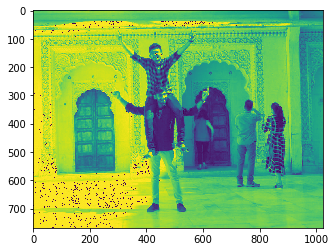

GREEN Component 


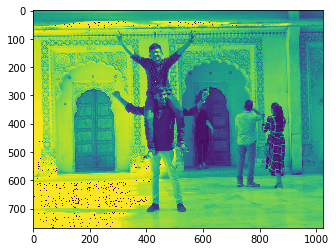

BLUE Component 


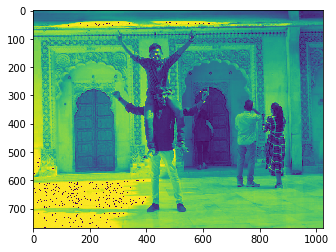

In [122]:
# reconstruction
iterations = 400

aRedCompressed = compressSingleChannel(aRed, iterations)
aGreenCompressed = compressSingleChannel(aGreen, iterations)
aBlueCompressed = compressSingleChannel(aBlue, iterations)

imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed, mode=None)
imb = Image.fromarray(aBlueCompressed, mode=None)

newImage = Image.merge("RGB", (imr, img, imb))



%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread('kena.png')
# imgplot = plt.imshow(main_photo)
imgplot = plt.imshow(imr)
print("RED Component ")
plt.show()
imgplot = plt.imshow(img)
print("GREEN Component ")
plt.show()
imgplot = plt.imshow(imb)
print("BLUE Component ")

plt.show()




Populating the interactive namespace from numpy and matplotlib
Original Image


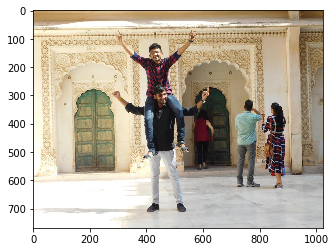

Compressed Image


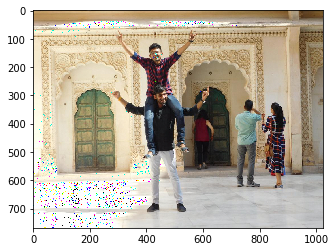

In [123]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(originalImage)
print("Original Image")

plt.show()
imgplot = plt.imshow(newImage)
print("Compressed Image")
plt.show()

In [124]:

# ratio
ih = imageHeight
iw = imageWidth

originalSize = ih * iw * 3
compressedSize = iterations * (1 + ih + iw) * 3

print('original size:')
print(originalSize)

print('compressed size:')
print(compressedSize)

ratio = compressedSize * 1.0 / originalSize
print(ratio)
print(f"compressed % = {ratio*100}")


original size:
3145728
compressed size:
2458800
0.7816314697265625
compressed % = 78.16314697265625
